In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = 'F:\\Final Thesis Paper'
os.chdir(dir_Path)

In [3]:
import pandas as pd 

Reviewdata = pd.read_csv('train_dataset.csv')

In [4]:
Reviewdata.shape

(164, 3)

In [5]:
Reviewdata.head()

,Timestamp,Response,Comments
0,1/25/2021 10:55:05,Positive,Flyover need for us but public not use is
1,1/25/2021 10:55:06,Positive,Flyover helps for ambulance.
2,1/25/2021 10:55:07,Positive,Local bus not use flyover. But private car use...
3,1/25/2021 10:55:08,Negative,Not use public it.
4,1/25/2021 10:55:09,Negative,Rickshaw can not use it.


In [6]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  23 non-null     object
 1   Response   164 non-null    object
 2   Comments   164 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [7]:
Reviewdata.describe().transpose()

,count,unique,top,freq
Timestamp,23,23,1/29/2021 9:12:24,1
Response,164,2,Negative,87
Comments,164,23,"Does not use local bus, Tempo, Laguna flyover.",10


In [8]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Timestamp,141,85.97561
Comments,0,0.00000
Response,0,0.00000


Percentage for default

Negative    53.05
Positive    46.95
Name: Response, dtype: float64


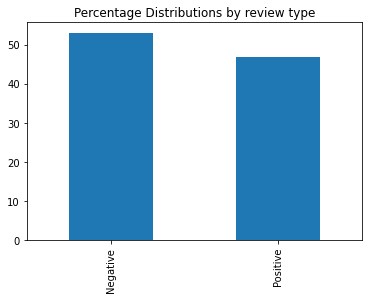

In [9]:

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [11]:

#import matplotlib.pyplot as plt
#%matplotlib inline
#print('Percentage for default\n')
#print(round(Reviewdata.Traffic_Hour.value_counts(normalize=True)*100,2))
#round(Reviewdata.Traffic_Hour.value_counts(normalize=True)*100,2).plot(kind='bar')
#plt.title('Percentage Distributions by review type')
#plt.show()

In [12]:

Reviewdata.drop(columns = ['Timestamp'], inplace = True)

In [13]:

import re
import string


def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)
Reviewdata.head(10)

,Response,Comments
0,Positive,Flyover need for us but public not use is
1,Positive,Flyover helps for ambulance.
2,Positive,Local bus not use flyover. But private car use...
3,Negative,Not use public it.
4,Negative,Rickshaw can not use it.
5,Negative,Bus Tempo does not use these flyovers. Can't p...
6,Positive,It will reduce traffic.
7,Positive,Flyover can decress traffic if we use it.
8,Positive,"It helps for motorcyle, CNG, Car and Microbus."
9,Negative,Flyover not reduct traffice jam


In [14]:

Reviewdata['cleaned_comments'] = pd.DataFrame(Reviewdata.Comments.apply(cleaned1))
Reviewdata.head(10)

,Response,Comments,cleaned_comments
0,Positive,Flyover need for us but public not use is,flyover need for us but public not use is
1,Positive,Flyover helps for ambulance.,flyover helps for ambulance
2,Positive,Local bus not use flyover. But private car use...,local bus not use flyover but private car use it
3,Negative,Not use public it.,not use public it
4,Negative,Rickshaw can not use it.,rickshaw can not use it
5,Negative,Bus Tempo does not use these flyovers. Can't p...,bus tempo does not use these flyovers cant pic...
6,Positive,It will reduce traffic.,it will reduce traffic
7,Positive,Flyover can decress traffic if we use it.,flyover can decress traffic if we use it
8,Positive,"It helps for motorcyle, CNG, Car and Microbus.",it helps for motorcyle cng car and microbus
9,Negative,Flyover not reduct traffice jam,flyover not reduct traffice jam


In [15]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)
Reviewdata.head(10)

,Response,Comments,cleaned_comments
0,Positive,Flyover need for us but public not use is,flyover need for us but public not use is
1,Positive,Flyover helps for ambulance.,flyover helps for ambulance
2,Positive,Local bus not use flyover. But private car use...,local bus not use flyover but private car use it
3,Negative,Not use public it.,not use public it
4,Negative,Rickshaw can not use it.,rickshaw can not use it
5,Negative,Bus Tempo does not use these flyovers. Can't p...,bus tempo does not use these flyovers cant pic...
6,Positive,It will reduce traffic.,it will reduce traffic
7,Positive,Flyover can decress traffic if we use it.,flyover can decress traffic if we use it
8,Positive,"It helps for motorcyle, CNG, Car and Microbus.",it helps for motorcyle cng car and microbus
9,Negative,Flyover not reduct traffice jam,flyover not reduct traffice jam


In [16]:
# Let's take a look at the updated text
Reviewdata['cleaned_comments_new'] = pd.DataFrame(Reviewdata['cleaned_comments'].apply(cleaned2))
Reviewdata.head(10)

,Response,Comments,cleaned_comments,cleaned_comments_new
0,Positive,Flyover need for us but public not use is,flyover need for us but public not use is,flyover need for us but public not use is
1,Positive,Flyover helps for ambulance.,flyover helps for ambulance,flyover helps for ambulance
2,Positive,Local bus not use flyover. But private car use...,local bus not use flyover but private car use it,local bus not use flyover but private car use it
3,Negative,Not use public it.,not use public it,not use public it
4,Negative,Rickshaw can not use it.,rickshaw can not use it,rickshaw can not use it
5,Negative,Bus Tempo does not use these flyovers. Can't p...,bus tempo does not use these flyovers cant pic...,bus tempo does not use these flyovers cant pic...
6,Positive,It will reduce traffic.,it will reduce traffic,it will reduce traffic
7,Positive,Flyover can decress traffic if we use it.,flyover can decress traffic if we use it,flyover can decress traffic if we use it
8,Positive,"It helps for motorcyle, CNG, Car and Microbus.",it helps for motorcyle cng car and microbus,it helps for motorcyle cng car and microbus
9,Negative,Flyover not reduct traffice jam,flyover not reduct traffice jam,flyover not reduct traffice jam


In [17]:

import re
def tokenize(txt):
    tokens = re.split('\w+', txt)
    return tokens
Reviewdata['msg_clean_tokenized']=Reviewdata['cleaned_comments_new'].apply(lambda x:tokenize(x.lower()))
Reviewdata.head()

,Response,Comments,cleaned_comments,cleaned_comments_new,msg_clean_tokenized
0,Positive,Flyover need for us but public not use is,flyover need for us but public not use is,flyover need for us but public not use is,"[, , , , , , , , , ]"
1,Positive,Flyover helps for ambulance.,flyover helps for ambulance,flyover helps for ambulance,"[, , , , ]"
2,Positive,Local bus not use flyover. But private car use...,local bus not use flyover but private car use it,local bus not use flyover but private car use it,"[, , , , , , , , , , ]"
3,Negative,Not use public it.,not use public it,not use public it,"[, , , , ]"
4,Negative,Rickshaw can not use it.,rickshaw can not use it,rickshaw can not use it,"[, , , , , ]"


In [24]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_comments_new
Dependent_var = Reviewdata.Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 147
IV_test  : 17
DV_train : 147
DV_test  : 17


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [58]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[8, 1],
       [0, 8]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9411764705882353
Precision :  0.9477124183006536
Recall :  0.9411764705882353


In [60]:
example = ["it helps us but we do not use flyover"]
result = model.predict(example)

print(result) 

['Positive']


In [493]:
import joblib

In [494]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [495]:
loaded_model = joblib.load(filename)

In [496]:
result = loaded_model.predict(example)

print(result)

['Negative']


In [497]:
import pickle

filename = 'finalized_model_pickle.sav'
pickle.dump(model, open(filename, 'wb'))

In [498]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict(example)
print(result)

['Negative']


In [499]:
!dir

 Volume in drive F has no label.
 Volume Serial Number is BCA1-C1E6

 Directory of F:\thesis

30/04/2021  10:06 PM    <DIR>          .
30/04/2021  10:06 PM    <DIR>          ..
12/03/2021  07:04 PM           546,481 1491395900_GS435ijarse.pdf
30/04/2021  10:06 PM             4,977 finalized_model.sav
30/04/2021  10:06 PM             4,685 finalized_model_pickle.sav
26/04/2021  12:08 PM            58,229 research paper old.docx
30/04/2021  08:51 PM           374,302 research paper.docx
30/04/2021  09:19 PM    <DIR>          Reserve
30/04/2021  09:58 PM             1,567 test.csv
26/04/2021  09:29 PM            26,569 Traffic_Sentimental_Analysis - Copy.csv
30/04/2021  07:42 PM            48,524 Traffic_Sentimental_Analysis.csv
30/04/2021  07:25 PM        35,726,565 train.csv
30/04/2021  09:59 PM             1,563 train_dataset.csv
              10 File(s)     36,793,462 bytes
               3 Dir(s)   1,180,536,832 bytes free
